# 1. Lecture overview

- The capital allocation line
    - All portfolios containing a risky asset and a risk-free asset lie on the same line in the mean-volatility space
- Optimal capital allocation
    - For a given level of risk aversion, what is the optimal proportion of your funds that you should invest in risky assets?

# 2. The capital allocation line (CAL)

Let P be a risky asset (or portfolio) with return $R_P$ and let $R_f$ be the return on the risk-free asset. Then, a capital allocation is a proportion $w_{c}$ of funds you invest in the risky asset P (the proportion investend in the risk free asset will be $1 - w_{c}$). Different choices of $w_{c}$ will result in different capital allocations. 

The **return of the complete portfolio** C (containing P and the risk-free asset) given by a given capital allocation $w_{c}$ is:

$$R_C = w_{c} R_P + (1 - w_{c}) R_f$$

The **expected return of the complete portfolio** is

$$E[R_C] = w_{c} E[R_P] + (1 - w_{c}) R_f$$

Because the future return on the risk-free asset is known ahead of time (guaranteed by the U.S. government), we have $E[R_f] = R_f$, which is why we can use $R_f$ in the equation above.

The **variance of the complete portfolio** is

$$Var[R_C] =  w_{c}^2 Var[R_P] + (1 - w_{c})^2 Var[R_f] + 2 w_{c} (1 - w_{c}) Cov[R_P, R_f]$$

Because, as explained above, $R_f$ is a constant, not a random variable, its variance is 0 and it's covariance with any other random variable is 0. So, in the above equation $Var[R_f] = 0$ and $Cov[R_P, R_f] = 0$. Substituting these in the above equation we obtain

$$Var[R_C] =w_{c}^2 Var[R_P]$$

By taking square roots on both sides we obtain the **standard deviation of the complete porfolio**:

$$\sigma_{C} = w_{c} \sigma_{P}$$

where $\sigma_{P}$ is the standard deviation of returns of the risky asset P.


**Example 2.1.**

Assume you have estimated that the expected return on TSLA is 10% and the standard deviation of its future returns is 12%. The risk-free rate is 1%. In this example, we will create 21 different capital allocations containing TSLA and the risk-free asset: the first will have a weight of 0% in TSLA, the next will have a weight of 10% in TSLA and so on (in increments of 10%) until the 21st capital allocation, which has 200% in TSLA. Calculate the expected returns and standard deviations of the 21 complete portfolios obtained from these capital allocations. Plot these portfolios in mean-volatility space. 

     wc     er     sd
0   0.0  0.010  0.000
1   0.1  0.019  0.012
2   0.2  0.028  0.024
3   0.3  0.037  0.036
4   0.4  0.046  0.048
5   0.5  0.055  0.060
6   0.6  0.064  0.072
7   0.7  0.073  0.084
8   0.8  0.082  0.096
9   0.9  0.091  0.108
10  1.0  0.100  0.120
11  1.1  0.109  0.132
12  1.2  0.118  0.144
13  1.3  0.127  0.156
14  1.4  0.136  0.168
15  1.5  0.145  0.180
16  1.6  0.154  0.192
17  1.7  0.163  0.204
18  1.8  0.172  0.216
19  1.9  0.181  0.228
20  2.0  0.190  0.240


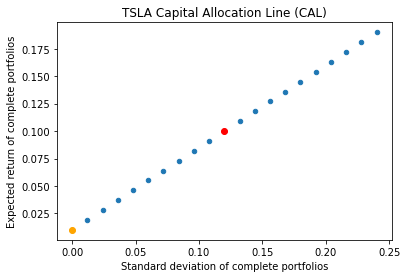

In [1]:
import pandas as pd
import numpy as np

# Inputs
er_tsla = 0.1
sd_tsla = 0.12
rf      = 0.01
N = 21

# Create dataframe where we will store our 21 expected returns and standard deviations
results = pd.DataFrame(np.nan, index = range(N), columns = ['wc', 'er', 'sd'])
#print(results)

# Loop through the 21 allocations
for n in range(N):
    #print(n)
  
    # calculate the weight for the current capital allocation
    wc = n * (2 / (N-1))
    
    # calculate expected return for the current complete portfolio
    er_c = wc * er_tsla + (1 - wc) * rf
    
    # calculate standard deviation for the current complete portfolio
    sd_c = wc * sd_tsla
    
    # store results in our "results" dataframe
    results['wc'][n] = wc
    results['er'][n] = er_c
    results['sd'][n] = sd_c
    
# Print results    
print(results) 

# Plot results in mean-volatility space
ax = results.plot.scatter(x = 'sd', y = 'er');
ax.set_xlabel('Standard deviation of complete portfolios')
ax.set_ylabel('Expected return of complete portfolios')
ax.set_title('TSLA Capital Allocation Line (CAL)')

# Add the 0% and 100% allocations to the plot in different colors
ax.scatter(results['sd'][0], results['er'][0], color = 'orange');
ax.scatter(results['sd'][10], results['er'][10], color = 'red');

# 2.1. Characteristics of the CAL

Every risky asset has its own capital allocation line (CAL). 

That CAL intersects the Y axis at the risk-free rate. 

The slope of a risky asset's CAL equals that asset's Sharpe ratio:

$$SlopeCAL = \frac{E[R_P] - R_f}{\sigma_{P}} $$

So the analytical equation for the CAL is:

$$E[R_C] = R_f + \sigma_{C} \frac{E[R_P] - R_f}{\sigma_{P}}$$

This tells us the relation between the risk and expected return of our complete portfolio, given the Sharpe ratio of the risky part of the portfolio.

# 3. Optimal Capital Allocation

The above formulas describe our complete portfolio once we have decided on a given capital allocation $w_c$. But how should we decide on what $w_c$ should be? It turns out that this depends on the risk aversion of the investor (that may be you, if you are investing your own money, but it need not be).

For an investor with risk aversion coefficient A, the optimal capital allocation (call it $w_{oca}$) is:

$$w_{oca} = \frac{E[R_P] - R_f}{A \sigma_{P}^2}$$

An investor's risk aversion A is calculated by asking them: "If you were to invest all your wealth in an investment with with variance $\sigma^2$, what is the minimal expected return you would require to make the investment?". Call that expected return $E[R]$. The coefficient of risk aversion A is given by:

$$A = \frac{E[R]}{\sigma^2}$$

**Example 3.1.**

Assume you have estimated that the expected return on TSLA is 5.6% and the standard deviation of its future returns is 18.6%. The risk-free rate is 0.1%. Your coefficient of risk aversion if 4. What is your optimal capital allocation?

In [2]:
# Inputs
er_tsla = 0.056
sd_tsla = 0.186
rf = 0.001
A = 4

# Optimal capital allocation
w_oca = (er_tsla - rf) / (A * (sd_tsla**2))

# Print results
print(f"Optimal capital allocation: invest {w_oca*100: .3f}% in TSLA and {(1 - w_oca)*100: .3f}% in the Tbill")

Optimal capital allocation: invest  39.744% in TSLA and  60.256% in the Tbill


## 3.1. Discussion

The optimal capital allocation tells you the right proportion of your funds to invest in a given risky asset P. By "given" we mean you (or your client) have already decided what that asset (or portfolio) P is. We will soon talk more about optimal ways to find P as well. But for now, we assume we have already done that and we know what P is. 

However, it is important to point out that the optimal capital allocation formula 

$$w_{oca} = \frac{E[R_P] - R_f}{A \sigma_{P}^2}$$

is only valid if $\sigma_{P}$ is the right measure of the risk we would be exposed to if we invested in P. If P is the only investment we make, then this is correct. But if we own other assets, and P becomes part of our larger, overall portfolio, then this is no longer correct. That's because a large part of P's total risk ($\sigma_{P}$) will be diversified away as part of our overall portfolio. 

So, in general, the optimal capital allocation formula above, should not be applied if P is an individual security  (such as TSLA in our previous example). Instead **it should be applied if P is a very well diversified portfolio of risky assets**, so that its total risk is very close to its systematic risk. 


# 4. Application

Download annual data on the S\&P500 index from Yahoo Finance over the past 50 years (ticker = GSPC). Assume the risk-free rate is 0.1% and your risk aversion coefficient is 4. What is your optimal capital allocation? 

In [3]:
# Import packages
import yfinance as yf
import pandas as pd

In [4]:
# Inputs
rf = 0.001
A = 4

In [5]:
# Download data and save it
sp = yf.download(tickers = '^GSPC',
                start = '1970-01-01',
                end = '2020-12-31',
                interval = '1mo').dropna()
sp.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,167.199997,180.270004,163.360001,179.630005,179.630005,2673710000
1985-02-01,179.630005,183.949997,177.750000,181.179993,181.179993,2194620000
1985-03-01,181.179993,183.889999,176.529999,180.660004,180.660004,2153090000
1985-04-01,180.660004,183.610001,177.860001,179.830002,179.830002,1981880000
1985-05-01,179.830002,189.979996,178.350006,189.550003,189.550003,2350340000


In [6]:
# Calculate S&P returns every month
sp_ret = sp['Close'].pct_change()
sp_ret.head()

Date
1985-01-01         NaN
1985-02-01    0.008629
1985-03-01   -0.002870
1985-04-01   -0.004594
1985-05-01    0.054051
Name: Close, dtype: float64

In [7]:
sp_er = sp_ret.mean()
sp_sd = sp_ret.std()
print(f' Market monthly expected return = {sp_er: .3f} \n Market monthly standard deviation = {sp_sd: .3f}')

 Market monthly expected return =  0.008 
 Market monthly standard deviation =  0.044


In [8]:
# Optimal capital allocation
w_oca = (sp_er - rf) / (A * (sp_sd**2))

# Print results
print(f"Optimal capital allocation: invest {w_oca*100: .3f} % in S&P500 and {(1 - w_oca)*100: .3f} in the Tbill")

Optimal capital allocation: invest  92.704 % in S&P500 and  7.296 in the Tbill


# 5. For next class

- Watch "Efficient Diversification with Two Risky Assets" video under "FIN 360 Review Videos" - "Asset Allocation" tab in D2L